In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# les statistiques des joueurs de foot

In [2]:
file = "C:/Users/AsusWidad/PROJET DATA FOOT/joueurs.xlsx"
df = pd.read_excel(file)
df.head()

C:\Users\AsusWidad\AppData\Local\Temp\ipykernel_125672\493955764.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel(file)


,Unnamed: 0,sofifa_id,player_url,short_name,long_name,salaire_annuel,player_positions,overall,potential,value_eur,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,11,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,24000000.0,"CF, ST",91,91,64000000.0,...,55+3,55+3,55+3,59+3,18+3,https://cdn.sofifa.net/players/165/153/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,NaN
1,1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,32766994.0,ST,91,91,84000000.0,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/241/120.png,https://cdn.sofifa.net/flags/es@2x.png,NaN,NaN
2,4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27149795.0,"CM, CAM",91,91,107500000.0,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,NaN
3,6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,119833581.0,"ST, LW",91,95,190500000.0,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,NaN
4,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,109000000.0,"RW, ST, CF",91,91,54000000.0,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,NaN


In [3]:
df.shape

(19239, 113)

### Représentons la relation entre le potentiel et la valeur d'un joueur

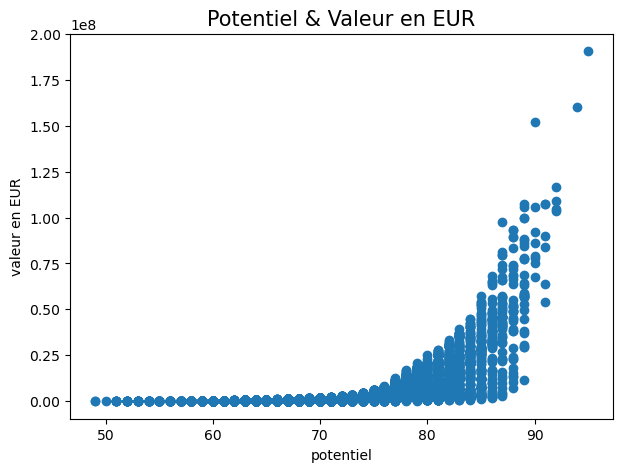

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("potentiel") 
plt.ylabel("valeur en EUR")
plt.title("Potentiel & Valeur en EUR", fontsize = 15)
plt.show()

### la relation entre la réputation et la valeur du joueur

Text(0.5, 1.0, 'Reputation & Valeur en EUR')

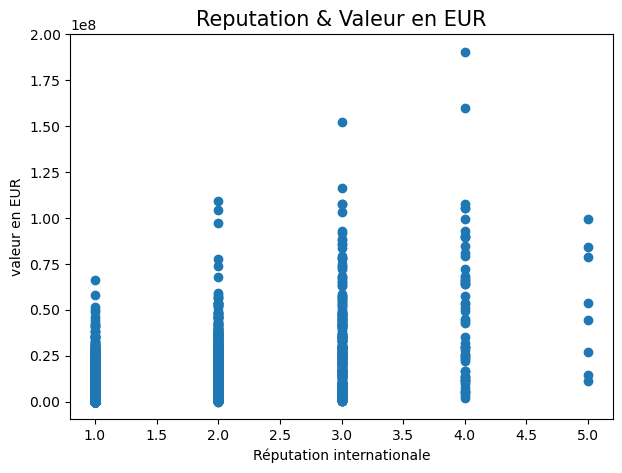

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['international_reputation'], y=df['value_eur'] )
plt.xlabel("Réputation internationale") 
plt.ylabel("valeur en EUR")
plt.title("Reputation & Valeur en EUR", fontsize = 15)

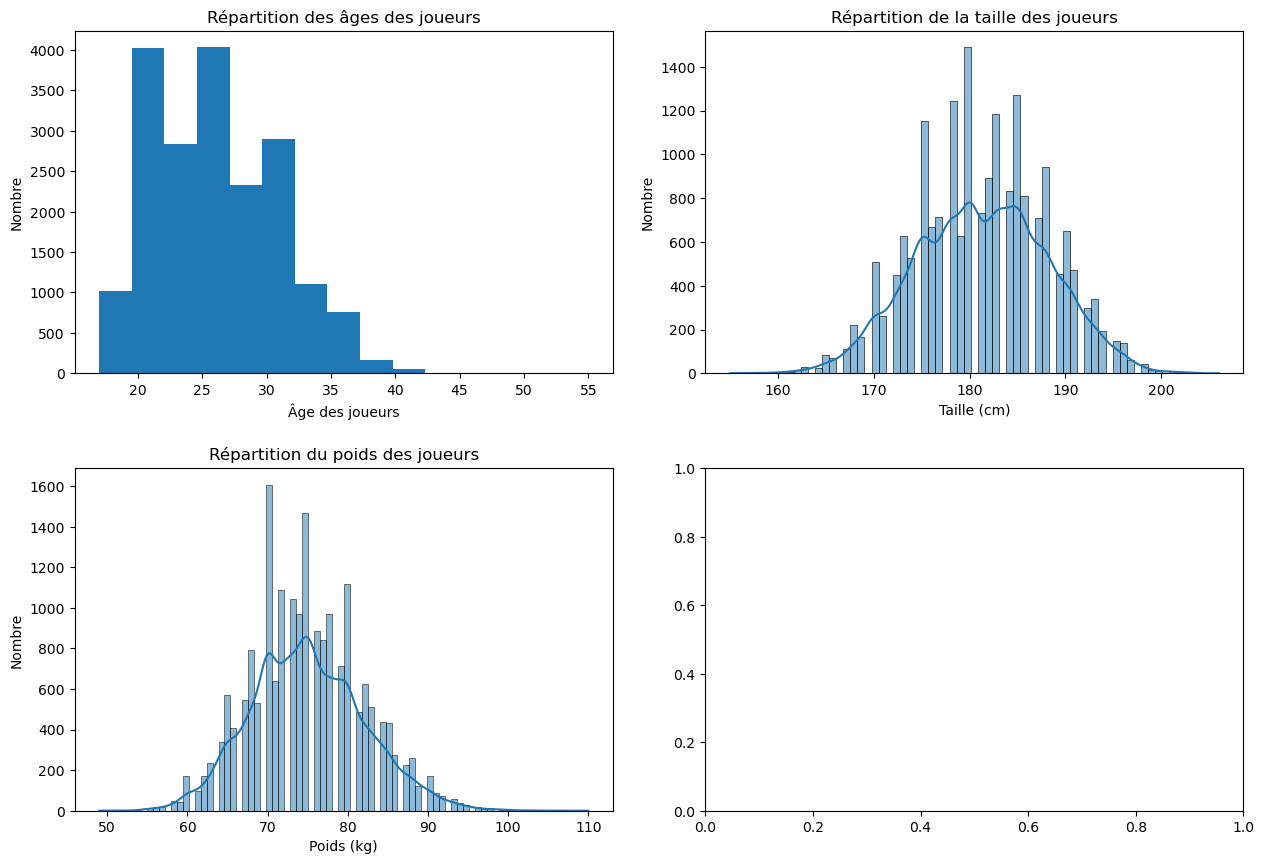

In [55]:

fig, axes = plt.subplots(2, 2, figsize=(13, 9))

axes[0,0].hist(df['age'], bins = 15)
axes[0,0].set_xlabel('Âge des joueurs')
axes[0,0].set_ylabel('Nombre')
axes[0,0].set_title('Répartition des âges des joueurs')


axes[0,1].set_title('Répartition de la taille des joueurs')
sns.histplot(df, x='height_cm', ax=axes[0,1], kde=True)
axes[0,1].set_xlabel('Taille (cm)')
axes[0,1].set_ylabel('Nombre')


axes[1,0].set_title('Répartition du poids des joueurs')
sns.histplot(df, x='weight_kg', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Poids (kg)')
axes[1,0].set_ylabel('Nombre')


plt.tight_layout(pad=2)
plt.show()

### Pied fort des footballeurs

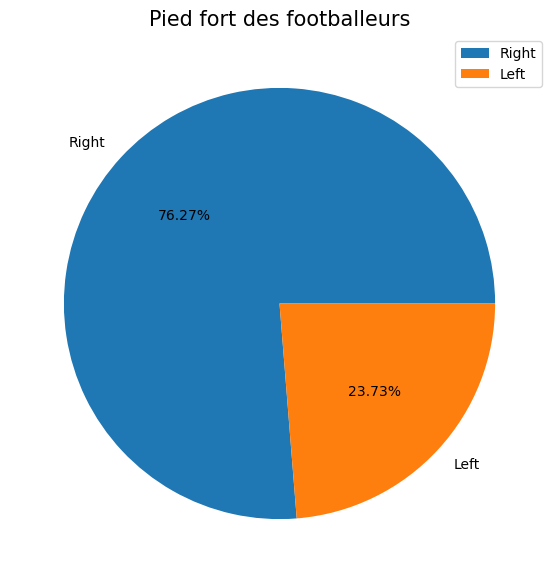

In [7]:
preferred_foot_labels = df["preferred_foot"].value_counts().index  
preferred_foot_values = df["preferred_foot"].value_counts().values 
explode = (0, 0.1)

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Pied fort des footballeurs',color = 'black',fontsize = 15)
plt.legend()
plt.show()

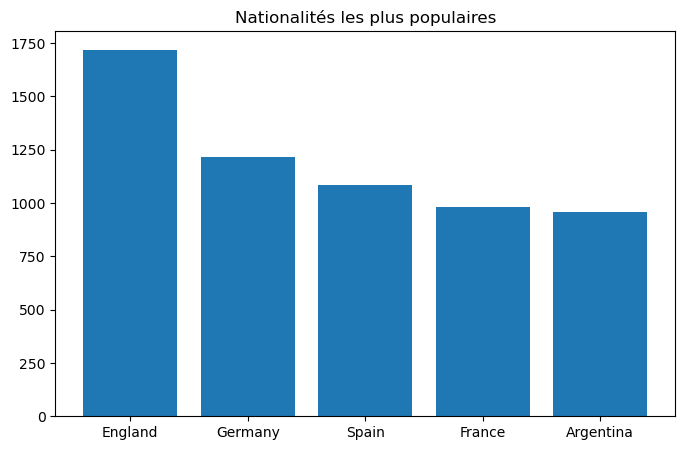

In [10]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Nationalités les plus populaires')
plt.show()

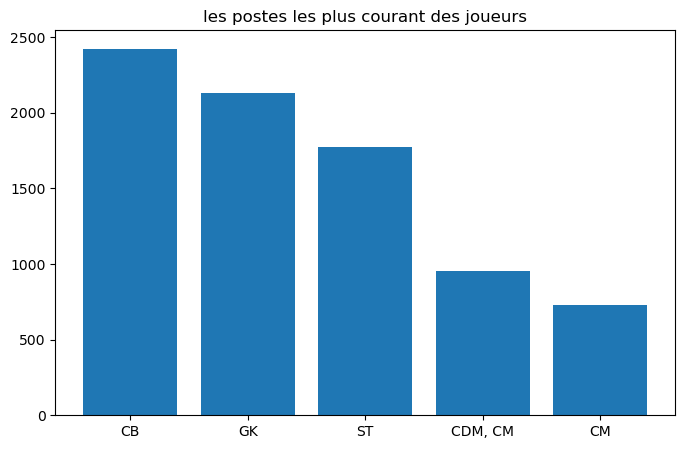

In [11]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    ax.set_title('les postes les plus courant des joueurs')
    plt.show()
    
fig, ax = plt.subplots(figsize = (8,5))
plot_most_common('player_positions')
plt.show()

In [12]:

player_name = df[['salaire_annuel','short_name','club_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['salaire_annuel']).set_index('short_name')
player_name

,salaire_annuel,club_name,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,,
Cristiano Ronaldo,187239970.0,Al Nassr,27000000.0,87,37,Portugal,87,5
K. Mbappé,119833581.0,Paris Saint-Germain,190500000.0,91,23,France,95,4
L. Messi,109000000.0,Paris Saint-Germain,54000000.0,91,35,Argentina,91,5
Neymar Jr,79000000.0,Paris Saint-Germain,99500000.0,89,30,Brazil,89,5
M. Salah,49618592.0,Liverpool,99500000.0,89,30,Egypt,89,4
E. Haaland,36511794.0,Manchester City,160000000.0,89,21,Norway,94,4
R. Lewandowski,32766994.0,FC Barcelona,84000000.0,91,33,Poland,91,5
E. Hazard,29172407.0,Real Madrid CF,30000000.0,83,31,Belgium,83,4
Iniesta,28085995.0,Vissel Kobe,5500000.0,79,38,Spain,79,4


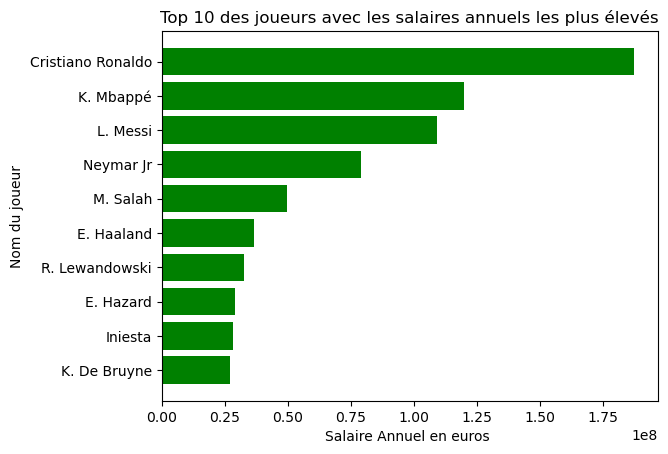

In [66]:

player_name = df[['salaire_annuel','short_name','club_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['salaire_annuel']).set_index('short_name')

df_sorted = player_name.sort_values(by='salaire_annuel', ascending=True)

fig, ax = plt.subplots()
ax.barh(df_sorted.index, df_sorted['salaire_annuel'] , color='green')
ax.set_xlabel('Salaire Annuel en euros ')
ax.set_ylabel('Nom du joueur')
ax.set_title('Top 10 des joueurs avec les salaires annuels les plus élevés')
plt.show()

<img src="salairesJoueurs.jpg" />

### La somme des valeurs des joueurs par club

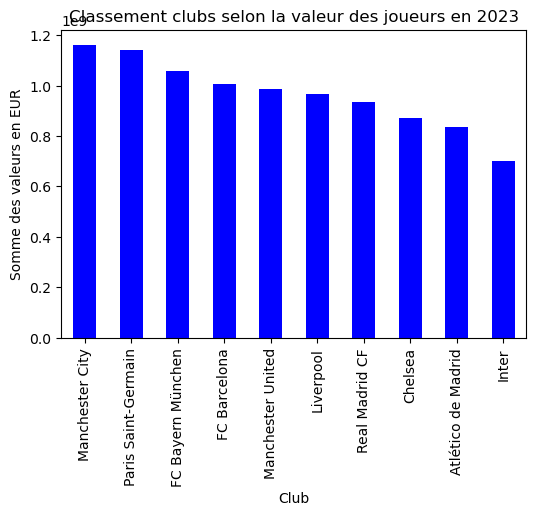

In [70]:
sommes_par_club = df.groupby('club_name')['value_eur'].sum()
plus_grands_clubs = sommes_par_club.nlargest(10)

ax = plus_grands_clubs.plot(kind='bar', color='blue', figsize=(6,4))

ax.set_title('Classement clubs selon la valeur des joueurs en 2023')
ax.set_xlabel('Club')
ax.set_ylabel('Somme des valeurs en EUR')

plt.show()

### TOP 20 meilheur joueurs

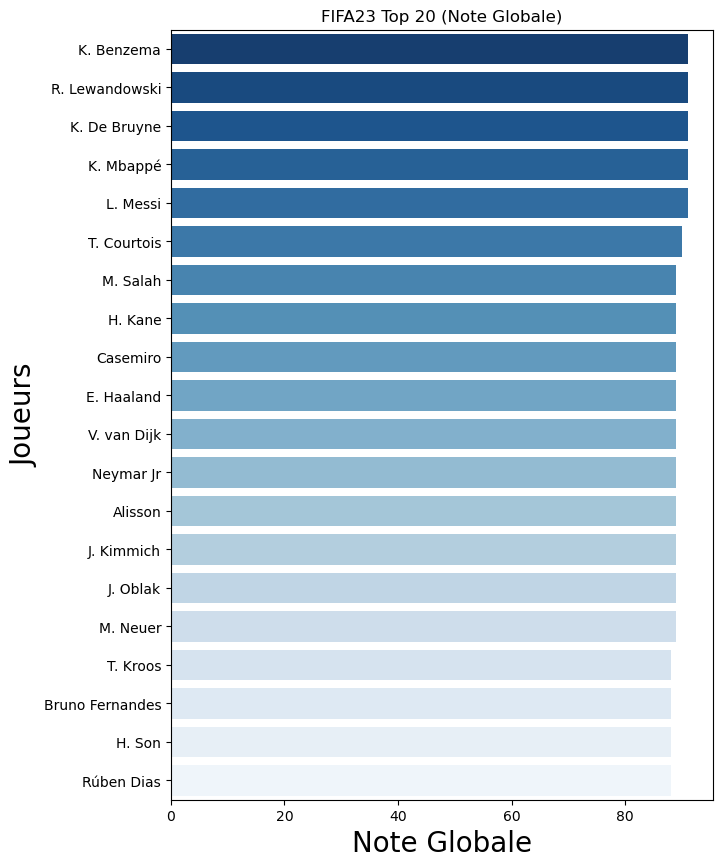

In [17]:
top_20 = df.nlargest(20, 'overall')

Overall = top_20["overall"]
footballer_name = top_20["short_name"]


data = pd.DataFrame({'short_name': footballer_name,'overall':Overall})

x = data['short_name'].head(20) 
y = data['overall'].head(20)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Note Globale', size = 20) 
plt.ylabel('Joueurs', size = 20 ) 
plt.title('FIFA23 Top 20 (Note Globale)')

plt.show()

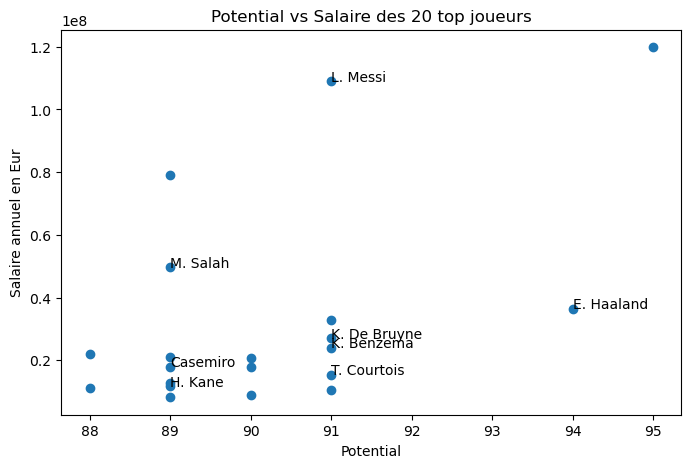

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_20['potential'], top_20['salaire_annuel'] )
plt.text(top_20.iloc[0]['potential'], top_20.iloc[0]['salaire_annuel'], top_20.iloc[0]['short_name'])
# plt.text(top_15.iloc[1]['potential'], top_15.iloc[1]['wage_eur'], top_15.iloc[1]['short_name']) for better view
plt.text(top_20.iloc[2]['potential'], top_20.iloc[2]['salaire_annuel'], top_20.iloc[2]['short_name'])
# plt.text(top_15.iloc[3]['potential'], top_15.iloc[3]['wage_eur'], top_15.iloc[3]['short_name'])
plt.text(top_20.iloc[4]['potential'], top_20.iloc[4]['salaire_annuel'], top_20.iloc[4]['short_name'])
plt.text(top_20.iloc[5]['potential'], top_20.iloc[5]['salaire_annuel'], top_20.iloc[5]['short_name'])
plt.text(top_20.iloc[6]['potential'], top_20.iloc[6]['salaire_annuel'], top_20.iloc[6]['short_name'])
plt.text(top_20.iloc[7]['potential'], top_20.iloc[7]['salaire_annuel'], top_20.iloc[7]['short_name'])
plt.text(top_20.iloc[8]['potential'], top_20.iloc[8]['salaire_annuel'], top_20.iloc[8]['short_name'])
plt.text(top_20.iloc[9]['potential'], top_20.iloc[9]['salaire_annuel'], top_20.iloc[9]['short_name'])

ax.set_title("Potential vs Salaire des 20 top joueurs")
ax.set_ylabel('Salaire annuel en Eur')
ax.set_xlabel('Potential')

plt.show()

# les statistiques des ballons d'or :

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/FigoBallond%27Or2000_%28cropped%29.jpg/270px-FigoBallond%27Or2000_%28cropped%29.jpg" alt="Alternative text" />

In [21]:
file = "C:/Users/AsusWidad/PROJET DATA FOOT/ballonOr.csv"
dfb = pd.read_csv(file)

In [22]:
dfb['Joueur'].value_counts().head()

Lionel Messi         7
Cristiano Ronaldo    5
Michel Platini       3
Marco van Basten     3
Johan Cruyff         3
Name: Joueur, dtype: int64

In [23]:
dfb['Club'].value_counts().head()

Real Madrid      12
FC Barcelone     12
Milan AC          8
Juventus          8
Bayern Munich     5
Name: Club, dtype: int64

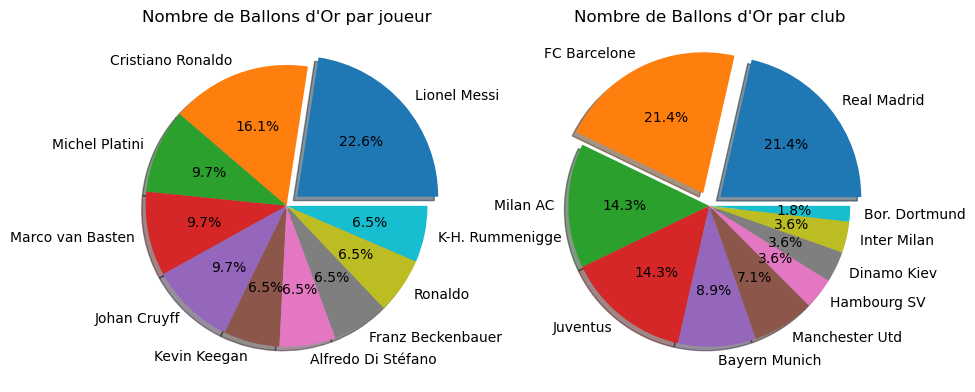

In [24]:
counts_player = dfb['Joueur'].value_counts().nlargest(10)
counts_club = dfb['Club'].value_counts().nlargest(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

maxIndex = counts_player.idxmax()
explode_player = [0 if label != maxIndex else 0.1 for label in counts_player.index]
ax1.pie(counts_player, labels=counts_player.index, explode=explode_player, shadow=True, autopct='%1.1f%%')
ax1.set_title('Nombre de Ballons d\'Or par joueur')


maxIndex = counts_club.nlargest(2)
explode_club = [0.1 if label in maxIndex.index else 0 for label in counts_club.index]
ax2.pie(counts_club, labels=counts_club.index, explode=explode_club, shadow=True, autopct='%1.1f%%')
ax2.set_title('Nombre de Ballons d\'Or par club')

plt.show()

# Stat de la ligue des champions 

<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/9/9a/Logo_UEFA_Champions_League_-_2021.svg/langfr-270px-Logo_UEFA_Champions_League_-_2021.svg.png" alt="Alternative text" />

In [25]:
file = "C:/Users/AsusWidad/PROJET DATA FOOT/ligueDesChampions.xlsx"
dfch = pd.read_excel(file,index_col=0)
dfch.head()

,Année,Club,Lieu
0,2022,Real Madrid CF - Liverpool,"à Paris, Stade de France"
1,2021,Chelsea - Manchester City,"à Porto, Stade do Dragao"
2,2020,Bayern Munich - Paris SG,"à Lisbonne, Stadio de la Luz"
3,2019,Liverpool - Tottenham,"à Madrid, Stade Wanda Metropolitano"
4,2018,Real Madrid CF - Liverpool,"à Kiev, NSK Olimpijs"


In [26]:
clubs = dfch['Club']

def get_vainqueur(x):
    return x.split("-")[0]

dfch['Club'] = clubs.apply(get_vainqueur)
dfch['Club']

0     Real Madrid CF 
1            Chelsea 
2      Bayern Munich 
3          Liverpool 
4     Real Madrid CF 
           ...       
62    Real Madrid CF 
63    Real Madrid CF 
64    Real Madrid CF 
65    Real Madrid CF 
66    Real Madrid CF 
Name: Club, Length: 67, dtype: object

In [27]:
lieux = dfch.iloc[:, 2]
def get_pays(x):
    x = x.replace(",", "")
    return x.split(" ")[1]

dfch['lieu'] = lieux.apply(get_pays)
dfch['lieu']

0         Paris
1         Porto
2      Lisbonne
3        Madrid
4          Kiev
        ...    
62      Glasgow
63    Stuttgart
64    Bruxelles
65       Madrid
66        Paris
Name: lieu, Length: 67, dtype: object

In [28]:
finale = dfch.groupby(['lieu']).size().sort_values(ascending=False)
finale

lieu
Londres          7
Madrid           5
Bruxelles        4
Rome             4
Paris            4
Munich           4
Milan            4
Vienne           4
Glasgow          3
Lisbonne         3
Athènes          3
Amsterdam        2
Stuttgart        2
St-Denis         2
Rotterdam        2
Barcelone        2
Bari             1
Séville          1
Porto            1
Cardiff          1
Belgrade         1
Gelsenkirchen    1
Berlin           1
Manchester       1
Berne            1
Kiev             1
Istanbul         1
Moscou           1
dtype: int64

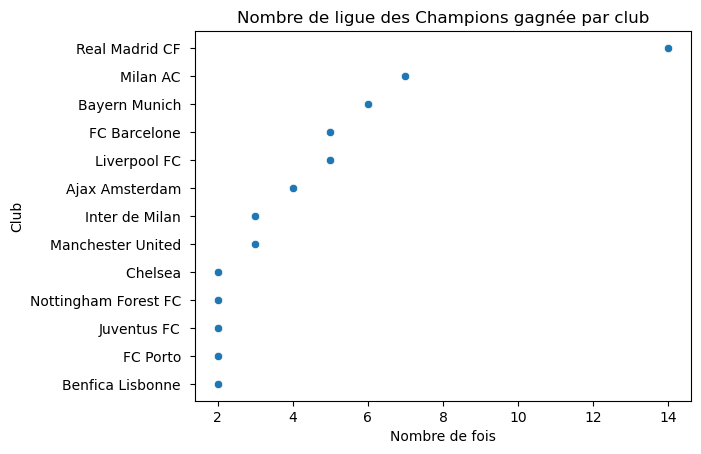

In [29]:
data = dfch['Club'].value_counts().nlargest(13)

df_data = pd.DataFrame({'Club': data.index, 'Nombre': data.values})

sns.scatterplot(x='Nombre', y='Club', data=df_data)

plt.xlabel('Nombre de fois')
plt.ylabel('Club')
plt.title('Nombre de ligue des Champions gagnée par club')

plt.show()

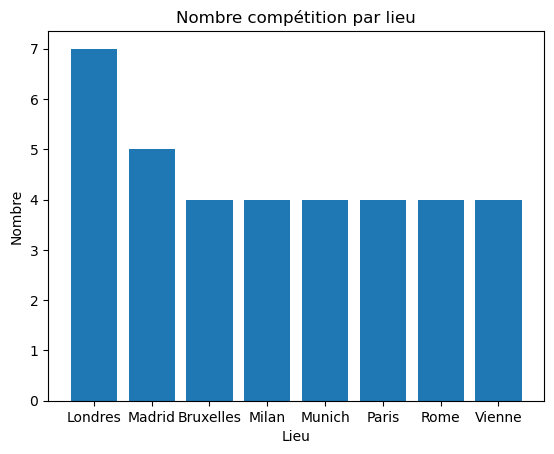

In [57]:

finale = dfch.groupby(['lieu']).size().nlargest(8)
fig, ax = plt.subplots()
ax.bar(finale.index, finale.values)
ax.set_xlabel('Lieu')
ax.set_ylabel('Nombre')
ax.set_title('Nombre compétition par lieu')
plt.show()

# Les matches de la ligue de champions 2022-2023

In [71]:
file_UEFA = "C:/Users/AsusWidad/PROJET DATA FOOT/match_data.csv"
df_UEFA = pd.read_csv(file_UEFA)

In [72]:
df_UEFA.head()

,saison,date_utc,statut,dernière_mise_à_jour,équipe_à_domicile,équipe_à_extérieur,vainqueur,durée,équipe_à_domicile_temps_complet,équipe_à_extérieur_temps_complet,équipe_à_domicile_mi_temps,équipe_à_extérieur_mi_temps,équipe_à_domicile_temps_supplémentaire,équipe_à_extérieur_temps_supplémentaire,équipe_à_domicile_penalties,équipe_à_extérieur_penalties,arbitres_nom,arbitres_nationalité
0,2022-06-21 - 2023-06-10,2022-06-21T13:00:00Z,FINISHED,2023-03-14T00:20:28Z,SP La Fiorita,Inter Club d'Escaldes,AWAY_TEAM,REGULAR,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,Rohit Saggi,Norway
1,2022-06-21 - 2023-06-10,2022-06-21T19:30:00Z,FINISHED,2023-03-14T00:20:28Z,FCI Levadia,KR Reykjavík,AWAY_TEAM,REGULAR,1.0,6.0,1.0,3.0,NaN,NaN,NaN,NaN,Tomasz Musial,NaN
2,2022-06-21 - 2023-06-10,2022-06-24T19:30:00Z,FINISHED,2023-03-14T00:20:28Z,Inter Club d'Escaldes,KR Reykjavík,AWAY_TEAM,REGULAR,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Urs Schnyder,Switzerland
3,2022-06-21 - 2023-06-10,2022-07-05T16:00:00Z,FINISHED,2023-03-14T00:20:28Z,FC Pyunik Yerevan,FC CFR 1907 Cluj,DRAW,REGULAR,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Bastian Dankert,Germany
4,2022-06-21 - 2023-06-10,2022-07-05T17:00:00Z,FINISHED,2023-03-14T00:20:28Z,Malmö FF,KF Víkingur,HOME_TEAM,REGULAR,3.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,Dumitru Muntean,NaN


In [73]:
for col in df_UEFA.columns: 
    print(col) 

saison
date_utc
statut
dernière_mise_à_jour
équipe_à_domicile
équipe_à_extérieur
vainqueur
durée
équipe_à_domicile_temps_complet
équipe_à_extérieur_temps_complet
équipe_à_domicile_mi_temps
équipe_à_extérieur_mi_temps
équipe_à_domicile_temps_supplémentaire
équipe_à_extérieur_temps_supplémentaire
équipe_à_domicile_penalties
équipe_à_extérieur_penalties
arbitres_nom
arbitres_nationalité


In [74]:
arbitresNationalité = df_UEFA.groupby(['arbitres_nationalité']).size().sort_values(ascending=False)
arbitresNationalité

arbitres_nationalité
Spain                     19
Italy                     19
England                   14
Germany                   12
France                    12
Netherlands               11
Poland                     8
Romania                    7
Switzerland                7
Sweden                     6
Slovenia                   6
Slovakia                   4
Portugal                   3
Turkey                     3
Hungary                    3
Greece                     3
Bosnia and Herzegovina     3
Norway                     2
Albania                    2
Denmark                    2
Croatia                    2
Lithuania                  2
North Macedonia            1
Montenegro                 1
Austria                    1
Latvia                     1
Israel                     1
Scotland                   1
Serbia                     1
Ireland                    1
Estonia                    1
Belgium                    1
dtype: int64

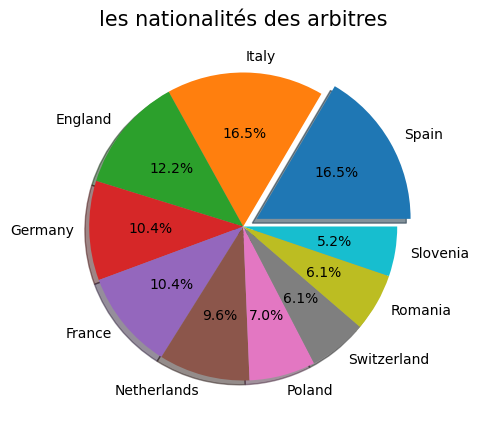

In [75]:
counts_arbitresNationalité = df_UEFA['arbitres_nationalité'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))

max_index = counts_arbitresNationalité.idxmax()
explode_arbitres = [0 if label != max_index else 0.1 for label in counts_arbitresNationalité.index]
plt.pie(counts_arbitresNationalité, labels=counts_arbitresNationalité.index, explode=explode_arbitres, shadow=True, autopct='%1.1f%%')
plt.title('les nationalités des arbitres',color = 'black',fontsize = 15)
plt.show()